In [1]:
import pandas as pd
import numpy as np
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
Data = pd.read_csv("kc_house_data.csv")

In [3]:
Data

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


# Question 1
Display the data types of each column using the function dtypes, then take a screenshot and submit it, include your code in the image.


In [4]:
Data.dtypes

id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

# Question 2
Drop the columns "id" and "Unnamed: 0" from axis 1 using the method drop(), then use the method describe() to obtain a statistical summary of the data. Take a screenshot and submit it, make sure the inplace parameter is set to True

In [5]:
Data.drop(columns = {"id"}, inplace = True)

In [6]:
Data.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


# Question 3
Use the method value_counts to count the number of houses with unique floor values, ensure it is a dataframe

In [7]:
Data["floors"].value_counts().to_frame()

,floors
1.0,10680
2.0,8241
1.5,1910
3.0,613
2.5,161
3.5,8


# Question 4
determine whether houses with a waterfront view or without a waterfront view have more price outliers.

<Axes: xlabel='waterfront', ylabel='price'>

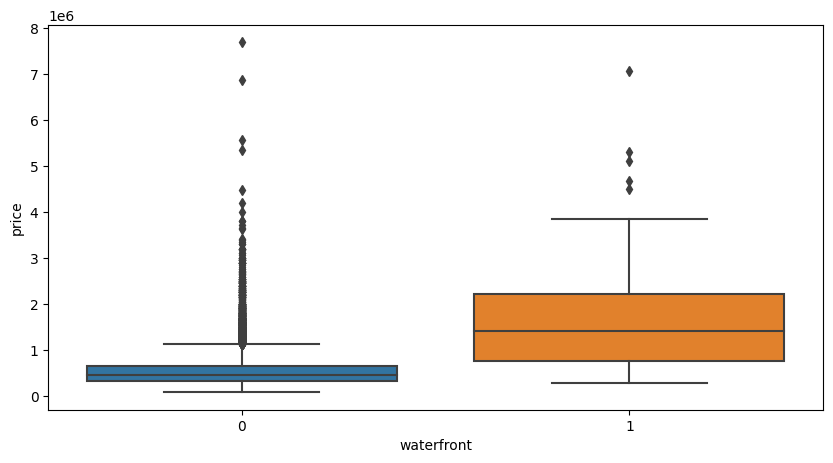

In [8]:
plt.figure(figsize = (10,5) )
sns.boxplot(data = Data, x = "waterfront", y = "price")

# OBSERVATION
Houses without a waterfront view have more price outliers

# Question 5
determine if the feature sqft_above is negatively or positively correlated with price.

In [9]:
Data[["sqft_above", "price"]].corr()
#OBSERVATION
#The feature sqft_above is positively correlated with price

,sqft_above,price
sqft_above,1.000000,0.605567
price,0.605567,1.000000


<Axes: xlabel='sqft_above', ylabel='price'>

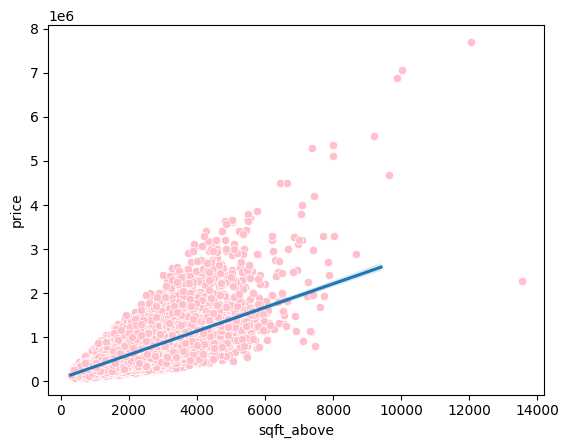

In [140]:
#Using a regression plot to see the correlation
sns.scatterplot(data = Data, x = "sqft_living", y ="price", color = "pink")
sns.regplot(data = Data, x = "sqft_above", y = "price", scatter = False)

# Question 6
Fit a linear regression model to predict the 'price' using the feature 'sqft_living' then calculate the R^2.

In [11]:
model = LinearRegression() #Defining the model

X = Data[["sqft_living"]]
y = Data[["price"]]

X_train, X_test, y_train, y_test = train_test_split(X,y, random_state = 0, test_size = 0.1) #Splitting the data 

model.fit(X_train , y_train) #Training the Data using our X and y variables

predicted = model.predict(X_test) #Making predictions

model.score(X_test, y_test) #Evaluating the model using the r^2 score



0.4728635169481378

# OBSERVATION
The r^2 score is 47.3%, meaning that the linear regression model using sqft_living as the independent variable can only 47.3% of the variations in the price

# Question 7¶
Fit a linear regression model to predict the 'price' using the list of features

In [12]:
features =["floors", "waterfront","lat" ,"bedrooms" ,"sqft_basement" ,"view" ,"bathrooms","sqft_living15","sqft_above","grade","sqft_living"]

In [13]:
X = Data[features]
y = Data["price"]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0, test_size = 0.1)

model = LinearRegression()

model.fit(X_train, y_train)

model.predict(X_test[0:5])



array([ 439612.17711172, 1407164.17711172,  469820.17711172,
        471356.17711172, 1089212.17711172])

# Question 8
Use the list to create a pipeline object to predict the 'price', fit the object using the features in the list features, and calculate the R^2.

In [96]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split

y = Data[["price"]]

X = Data[features]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0, test_size = 0.1)

my_pipeline = Pipeline([
    ("Scaler", StandardScaler()),
    ("poly", PolynomialFeatures(degree = 3, include_bias = False)),
    ("model", LinearRegression())
])

my_pipeline.fit(X_train, y_train)

my_pipeline.predict(X_test)

my_pipeline.score(X_test, y_test)

0.7848652096584261

# OBSERVATION
The r^2 score is about 78%, indicating that the features in the model can explain about 78% of the variations in the price

# QUESTION 9 
Create and fit a Ridge regression object using the training data, set the regularization parameter to 0.1, and calculate the R^2 using the test 

In [15]:
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split

poly = PolynomialFeatures(degree = 3)

features =["floors", "waterfront","lat" ,"bedrooms" ,"sqft_basement" ,"view" ,"bathrooms","sqft_living15","sqft_above",
           "grade","sqft_living"]

X = Data[features]

y = Data["price"]

X_poly = poly.fit_transform(X)

X_poly_train, X_poly_test, y_train, y_test = train_test_split( X_poly, y, random_state = 0, test_size = 0.1)

model = Ridge( alpha = 0.1)

model.fit(X_poly_train, y_train)

model.predict(X_poly_test)

model.score(X_poly_test, y_test)

0.753766622991054

# OBSERVATION
The r2_score is 75%, meaning using this model, the features can explain about 75% of the variations in the price values

# Question 10

Perform a second order polynomial transform on both the training data and testing data. Create and fit a Ridge regression object using the training data, set the regularisation parameter to 0.1, and calculate the R^2 utilising the test data provided.
regularisation parameter means alpha value

In [57]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split

poly = PolynomialFeatures(degree = 2)

X = Data[features]

y = Data["price"]

X_poly_train, X_poly_test, y_train, y_test = train_test_split(X, y, random_state = 0, test_size = 0.1)

X_poly = poly.fit_transform(X)

model = Ridge( alpha = 0.1)

model.fit(X_poly_train, y_train)

model.predict(X_poly_test)

model.score(X_poly_test, y_test)

0.6517178634921754

# OBSERVATION
The r2_score is 65%, meaning the features using this model can explain about 65% of the variations in the price

# Question 11
Do some analysis and show me insightful information that will increase awareness and investment most likely

In [68]:
Data.corr()


C:\Users\ENEJI\AppData\Local\Temp\ipykernel_9980\2003398639.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Data.corr()


,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
price,1.000000,0.308350,0.525138,0.702035,0.089661,0.256794,0.266369,0.397293,0.036362,0.667434,0.605567,0.323816,0.054012,0.126434,-0.053203,0.307003,0.021626,0.585379,0.082447
bedrooms,0.308350,1.000000,0.515884,0.576671,0.031703,0.175429,-0.006582,0.079532,0.028472,0.356967,0.477600,0.303093,0.154178,0.018841,-0.152668,-0.008931,0.129473,0.391638,0.029244
bathrooms,0.525138,0.515884,1.000000,0.754665,0.087740,0.500653,0.063744,0.187737,-0.124982,0.664983,0.685342,0.283770,0.506019,0.050739,-0.203866,0.024573,0.223042,0.568634,0.087175
sqft_living,0.702035,0.576671,0.754665,1.000000,0.172826,0.353949,0.103818,0.284611,-0.058753,0.762704,0.876597,0.435043,0.318049,0.055363,-0.199430,0.052529,0.240223,0.756420,0.183286
sqft_lot,0.089661,0.031703,0.087740,0.172826,1.000000,-0.005201,0.021604,0.074710,-0.008958,0.113621,0.183512,0.015286,0.053080,0.007644,-0.129574,-0.085683,0.229521,0.144608,0.718557
floors,0.256794,0.175429,0.500653,0.353949,-0.005201,1.000000,0.023698,0.029444,-0.263768,0.458183,0.523885,-0.245705,0.489319,0.006338,-0.059121,0.049614,0.125419,0.279885,-0.011269
waterfront,0.266369,-0.006582,0.063744,0.103818,0.021604,0.023698,1.000000,0.401857,0.016653,0.082775,0.072075,0.080588,-0.026161,0.092885,0.030285,-0.014274,-0.041910,0.086463,0.030703
view,0.397293,0.079532,0.187737,0.284611,0.074710,0.029444,0.401857,1.000000,0.045990,0.251321,0.167649,0.276947,-0.053440,0.103917,0.084827,0.006157,-0.078400,0.280439,0.072575
condition,0.036362,0.028472,-0.124982,-0.058753,-0.008958,-0.263768,0.016653,0.045990,1.000000,-0.144674,-0.158214,0.174105,-0.361417,-0.060618,0.003026,-0.014941,-0.106500,-0.092824,-0.003406
grade,0.667434,0.356967,0.664983,0.762704,0.113621,0.458183,0.082775,0.251321,-0.144674,1.000000,0.755923,0.168392,0.446963,0.014414,-0.184862,0.114084,0.198372,0.713202,0.119248


# From the pearson correlation function, it is evident that
# The variables that drive price up the most are -
# 1. sqft_living
# 2. grade
# 3. sqft_above

in this order

# FURTHER OBSERVATIONS
USING A STRIP PLOT to visualize the grade and the price, we can see that, the houses graded 13 are few but have the highest value for money. Using a regression plot to visualize the relstionships further we will observe that as the grades increase the price of the houses also increases simultaneously

<Axes: title={'center': ' Strip plot showing the Relationship between the grade of the house and the price'}, xlabel='grade', ylabel='price'>

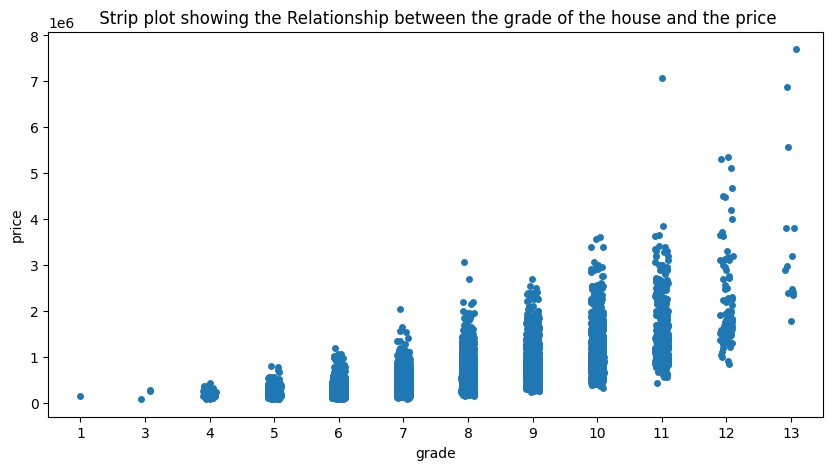

In [79]:
plt.figure(figsize = (10,5))
plt.title(" Strip plot showing the Relationship between the grade of the house and the price")
sns.stripplot( data = Data, x = "grade", y = "price")

<Axes: title={'center': ' Relationship between the grade of the house and the price'}, xlabel='grade', ylabel='price'>

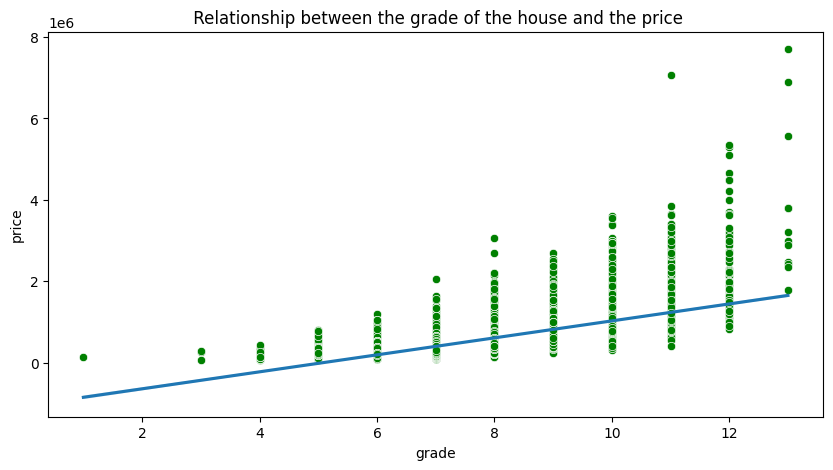

In [80]:
plt.figure(figsize = (10,5))
plt.title(" Relationship between the grade of the house and the price")
sns.scatterplot(data = Data, x = "grade", y ="price", color ="green")
sns.regplot (data = Data, x = "grade", y = "price", scatter = False)

<Axes: title={'center': ' Relationship between the square footage size of the house and the price'}, xlabel='sqft_living', ylabel='price'>

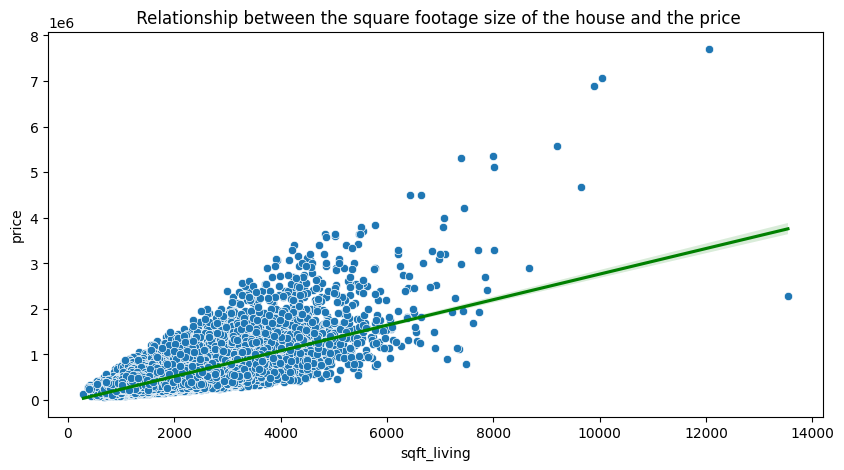

In [81]:
plt.figure(figsize = (10,5))
plt.title(" Relationship between the square footage size of the house and the price")
sns.regplot( data = Data, x = "sqft_living", y = "price", scatter = False, color = "green")
sns.scatterplot( data = Data, x = "sqft_living", y = "price")

# FURTHER OBSERVATIONS

It is evident from the plot above that as the square footage of the house increases, the price of the house increases

<Axes: title={'center': ' Relationship between the square footage of the house apart from the basement and the price'}, xlabel='sqft_above', ylabel='price'>

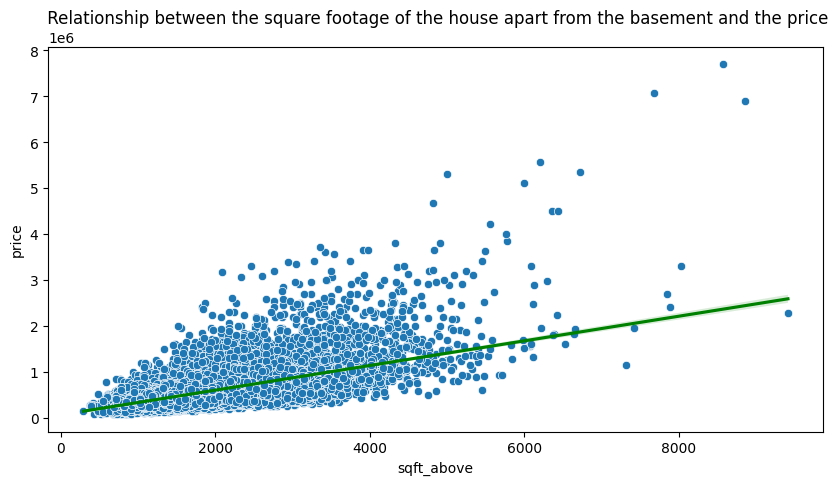

In [84]:
plt.figure(figsize = (10,5))
plt.title(" Relationship between the square footage of the house apart from the basement and the price")
sns.scatterplot(data = Data, x = "sqft_above", y = "price")
sns.regplot(data = Data, x = "sqft_above", y = "price", scatter = False, color = "green")

# FURTHER OBSERVATIONS

From the plot above, as the square footage of the house above the basement increases, the price of the house also increases

# USING TTEST TO ACCESS IF THERE IS A RELATIONSHIP BETWEEN THE BEDROOMS AND PRICE

In [91]:
#Null hypothesis - There is no difference between the number of bedrooms in houses and their prices 
#Using 0.05 as my significance value

from scipy.stats import ttest_ind 
ttest_ind(Data["bedrooms"], Data["price"], equal_var = True)


Ttest_indResult(statistic=-216.2732966626, pvalue=0.0)

# Conclusion, 
since the p-value (0) is lesser than the alpha value (0.05). I reject the null hypothesis. Implying that there is indeed a difference in the prices of houses according to the numbers of bedrooms

# USING A STRIP PLOT TO VISUALIZE THE RELATIONSHIP BETWEEN THE NUMBER OF BEDROOMS IN A HOUSE AND THE PRICE OF THE HOUSE

<Axes: xlabel='bedrooms', ylabel='price'>

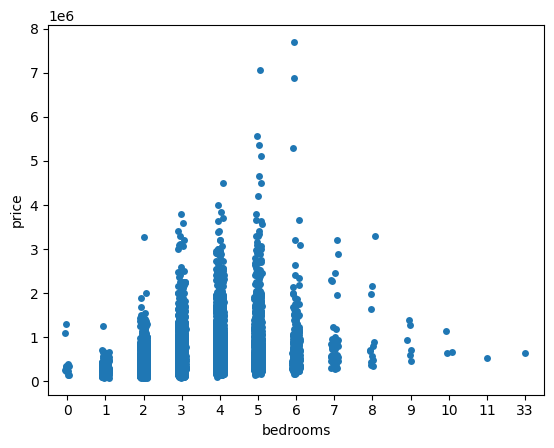

In [99]:
sns.stripplot(data = Data, x = "bedrooms", y = "price" )

OBSERVATION

Notice that as the number of bedrooms per house increases the price increases with houses with 0 to 6 bedrooms. Surprisingly houses with 7 bedrooms and above fail to sell for very high prices. Infact houses with 9 to 33 bedrooms sell for very low prices, even cheaper than some houses with 2 bedrooms.

# USING A HEATMAP TO VISUALIZE HOW THE AMOUNT OF BEDROOMS AND BATHROOMS AFFECT THE PRICE

In [118]:
grouped = Data.groupby(["bedrooms", "bathrooms"]).agg({"price" : "mean"}).reset_index()

In [121]:
t = grouped.pivot(index = "bedrooms", columns = "bathrooms")

Text(120.72222222222221, 0.5, 'Amount of bedrooms')

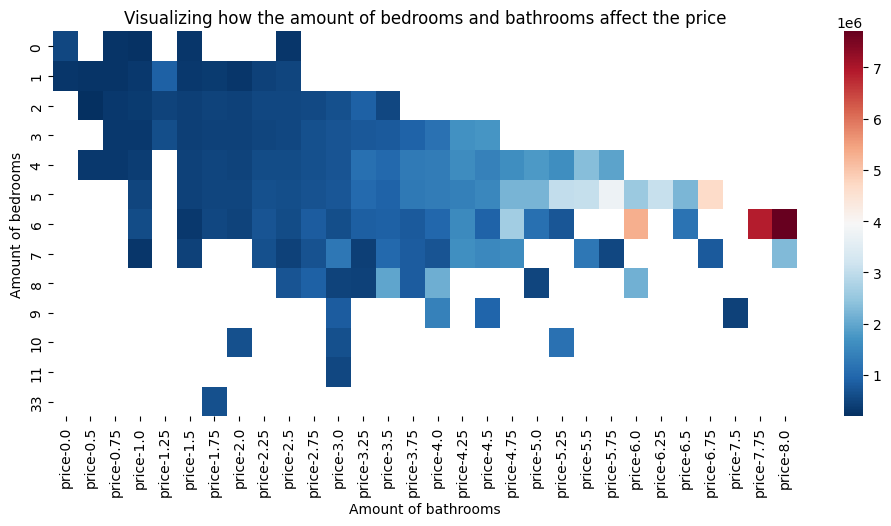

In [135]:
plt.figure(figsize = (12,5))
sns.heatmap(data = t, cmap = "RdBu_r")
plt.title("Visualizing how the amount of bedrooms and bathrooms affect the price")
plt.xlabel("Amount of bathrooms")
plt.ylabel("Amount of bedrooms")


# OBSERVATION

From the heatmap above, it is evident that regardless of the amount of the bedrooms, the price increased with respect to the amount of bathrooms.That is, as the number of bathrooms increases the price also increases